# Exploratory Data Analysis (EDA)

Этот ноутбук содержит анализ данных.
Датасет: `data_v1-06.csv`.
Цель:
- изучить данные;
- описать характеристики данных;
- подготовить выводы для дальнейшей работы;

## Шаг 0: Импортирование библиотек

Импортируем библиотеки для работы с данными и визуализации

- `pandas`: работа с DataFrame;
- `numpy`: числовые операции;
- `matplotlib` и `seaborn`: визуализация;

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Настройка стиля графиков
sns.set_style('whitegrid')

## Шаг 1: Загрузка данных

Загружаем датасет из папки `data`. Датасет содержит две колонки: `x` (признак) и `y` (целевая переменная)

In [3]:
df = pd.read_csv('../data/data_v1-06.csv')
df.head(10)

,x,y
0,0.01000,1.0145
1,0.03519,1.0203
2,0.06038,1.1508
3,0.08557,1.1833
4,0.11076,1.1797
5,0.13595,1.0025
6,0.16114,1.4880
7,0.18633,1.1090
8,0.21152,1.2097
9,0.23671,1.6791


## Шаг 2: Описание данных

Выводим информацию о данных:
- **Объём выборки**: Количество строк и столбцов;
- **Число признаков**: Колонка `x` (1 признак);
- **Типы данных и пропуски**: Проверяем, всё ли числовое и есть ли NaN;
- **Статистика**: Среднее, мин/макс, квартили для `x` и `y`;

In [4]:
# Общая информация
print("Объём выборки (строк, столбцов):", df.shape)
print(f"Число признаков: {len(df.columns) - 1}: {[x for x in df.columns[:len(df.columns) - 1]]}")

# Типы данных и пропуски
print("Информация о данных:")
df.info()

# Пропуски
print("Пропуски:")
print(df.isnull().sum())

# Статистическая сводка
print("Статистическая сводка:")
print(df.describe())

Объём выборки (строк, столбцов): (80, 2)
Число признаков: 1: ['x']
Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       80 non-null     float64
 1   y       80 non-null     float64
dtypes: float64(2)
memory usage: 1.4 KB
Пропуски:
x    0
y    0
dtype: int64
Статистическая сводка:
               x          y
count  80.000000  80.000000
mean    1.005003   3.571185
std     0.585360   2.450855
min     0.010000   0.368340
25%     0.507502   1.576475
50%     1.005005   2.891350
75%     1.502500   5.128350
max     2.000000  12.134000


## Шаг 3: Визуализация распределений

### 3.1 Гистограммы для `x` и `y` показывают их распределения. Это помогает понять:
- Нормальность (или асимметрию);
- Возможные выбросы;
- Диапазон значений;

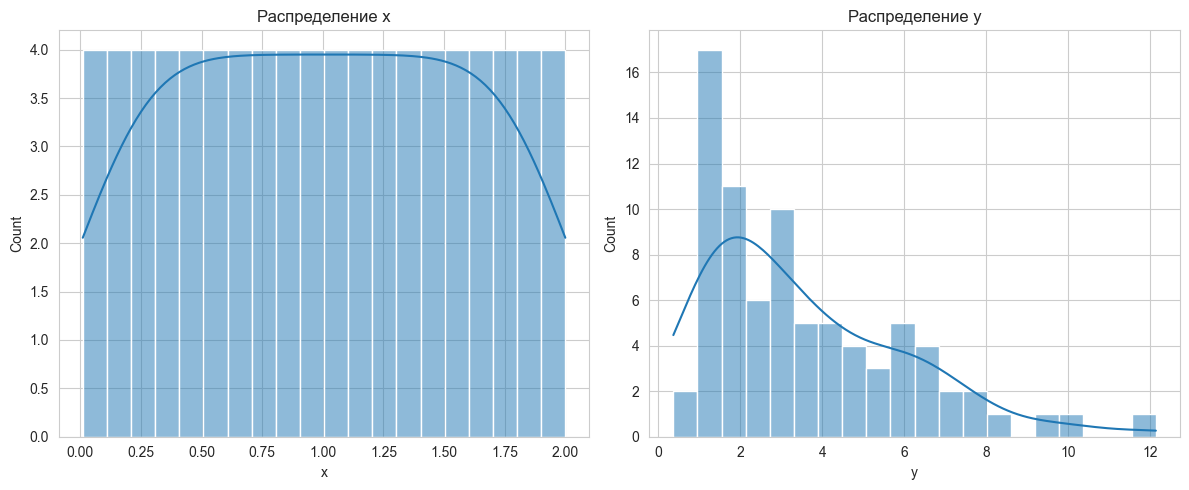

In [5]:
# Гистограммы
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['x'], bins=20, kde=True)
plt.title("Распределение x")

plt.subplot(1, 2, 2)
sns.histplot(df['y'], bins=20, kde=True)
plt.title("Распределение y")

plt.tight_layout()
plt.show()

### 3.2 Scatter plot (x vs y)

Scatter plot показывает зависимость `y` от `x`. Для линейной регрессии идеально, если точки образуют линейный паттерн.

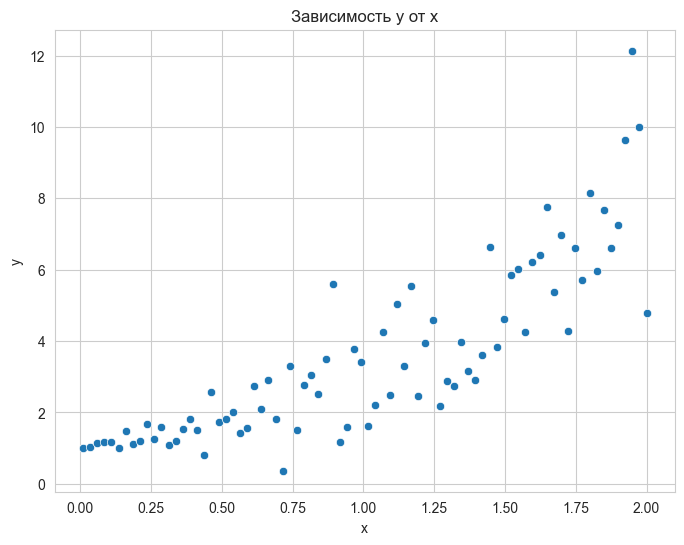

In [6]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['x'], y=df['y'])
plt.title("Зависимость y от x")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### 3.3 Box plots для выбросов
#### 3.3.1 Визуализация

Box plots помогают выявить выбросы в `x` и `y`. Выбросы — значения, выходящие за пределы `1.5*IQR` (межквартильного размаха)

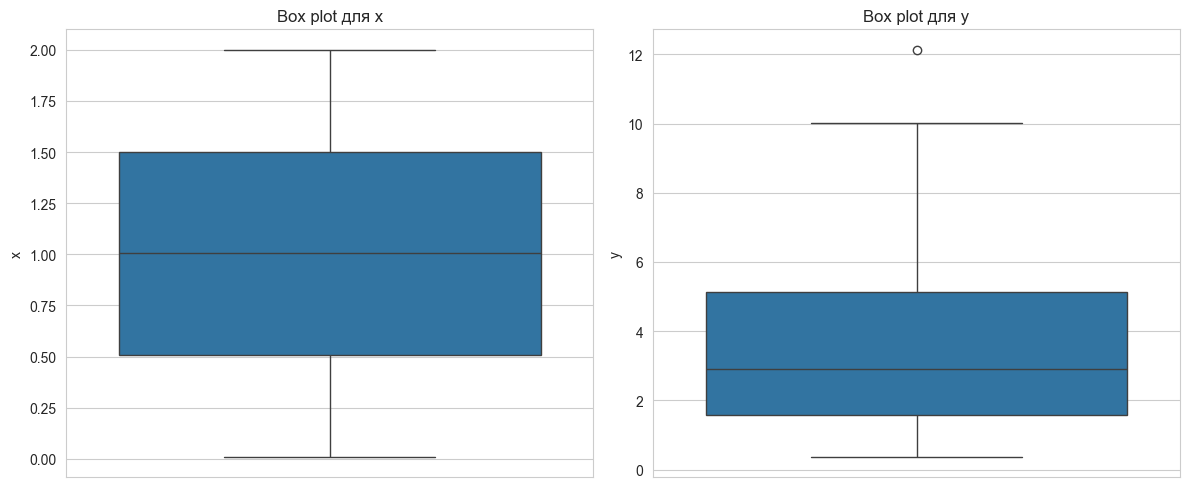

In [7]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['x'])
plt.title("Box plot для x")

plt.subplot(1, 2, 2)
sns.boxplot(y=df['y'])
plt.title("Box plot для y")

plt.tight_layout()
plt.show()

#### 3.3.2 Используем IQR для выявления и фильтрации выбросов в 'y'

In [8]:
Q1 = df['y'].quantile(0.25)
Q3 = df['y'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['y'] < lower_bound) | (df['y'] > upper_bound)]
print(f"Выбросы в y (IQR метод):")
print(outliers)

Выбросы в y (IQR метод):
         x       y
77  1.9496  12.134


#### 3.3.3 Удаляем выбросы

In [9]:
df_clean = df[(df['y'] >= lower_bound) & (df['y'] <= upper_bound)]
print(f"Размер данных после удаления выбросов: {df_clean.shape}")

Размер данных после удаления выбросов: (79, 2)


## Шаг 4: Корреляция

Проверяем корреляцию Пирсона между `x` и `y`. Значение близкое к 1 или -1 указывает на сильную линейную связь, что хорошо для линейной регрессии.

Корреляция между x и y: 0.8421


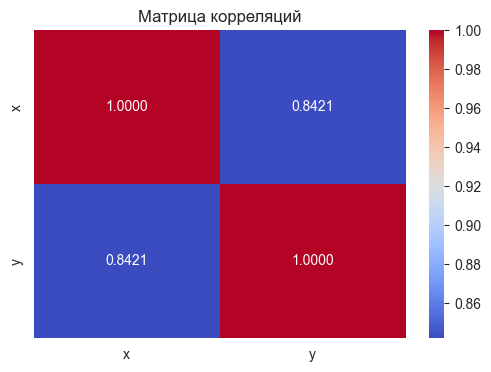

In [10]:
corr = df['x'].corr(df['y'])
print("Корреляция между x и y:", round(corr, 4))

# Визуализация корреляционной матрицы
corr_matrix = df.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.4f')
plt.title("Матрица корреляций")
plt.show()

## Шаг 5: Выводы

На основе анализа данных можно сделать следующие выводы:
- **Объём выборки**: `79` строк, `2` столбца];
- **Число признаков**: `1` (`x`);
- **Целевая переменная**: `y` — непрерывная, подходит для регрессии;
- **Пропуски**: `нет пропусков`;
- **Распределения**:
  - `x`: Равномерное;
  - `y`: Логнормальное;
- **Корреляция**: Корреляция между `x` и `y` = `0.8421`. Довольно близко к 1;
- **Выбросы**: `№77` `x = 1.9496` `y = 12.134` (был удалён);

## Шаг 6. Сохранение предобработанной базы данных.

In [13]:
df.to_csv('../data/data_cleaned.csv', index=False)
print("Данные сохранены в 'data/data_cleaned.csv'")

Данные сохранены в 'data/data_cleaned.csv'
